In [1]:
# Importing the necessary packages

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Binarizer
import sklearn.metrics 
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Computing the sigmoid activation value for a given input

def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

# Dot product between our features and weight matrix
# Step function to threshold (=0.5) the outputs to binary class labels
# Return the predictions --> preds = 0 or 1

def predict(X, W):
    preds = np.dot(X, W)
    for i in range(0,len(preds)):
        if preds[i] < 0.5:
            preds[i] = 0
        else:
            preds[i] = 1
    return preds  

[INFO] training...
[INFO] epoch=50, loss=99.5248298
[INFO] evaluating...
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       245
           1       0.95      0.74      0.83       255

   micro avg       0.85      0.85      0.85       500
   macro avg       0.87      0.85      0.85       500
weighted avg       0.87      0.85      0.85       500

The Accuracy is =  0.848


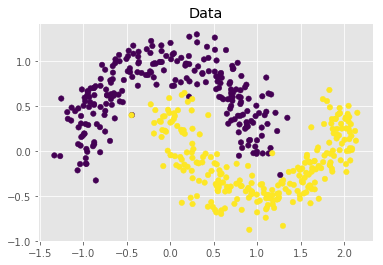

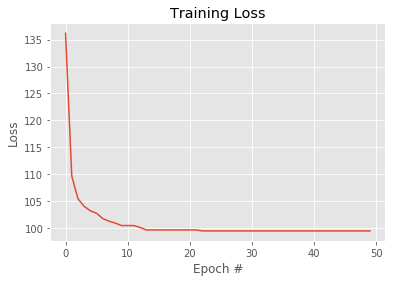

In [3]:
epochs = 50
alpha = 0.01

# generate a 2-class classification problem with 1,000 data points, where each data point is a 2D feature vector
# X: data
# y: label

(X, y) = make_moons(n_samples=1000, noise =0.15)
y = y.reshape((y.shape[0], 1))


# insert a column of 1's as the last entry in the feature
# matrix -- this little trick allows us to treat the bias
# as a trainable parameter within the weight matrix

X = np.c_[X, np.ones((X.shape[0]))]


# Partition the data into training and testing splits using 50% of
# the data for training and the remaining 50% for testing

(trainX, testX, trainY, testY) = train_test_split(X, y,test_size=0.5, random_state=12)

# initialize our weight matrix and list of losses

print("[INFO] training...")
W = np.random.randn(trainX.shape[1], 1)
losses = []

# loop over the desired number of epochs

for epoch in np.arange(0, epochs):
    
# Taking the dot product between our features `X` and the weight
# matrix `W`, then pass this value through our sigmoid activation
# function, thereby giving us our predictions on the dataset
    
    preds = predict(trainX,W)
    preds = sigmoid_activation(preds)
   
   
    
# now that we have our predictions, we need to determine the
# `error`, which is the difference between our predictions and the true values
# loss: loss value for each iteration

    error = preds - trainY
    loss = np.sum(error ** 2)

    
    
    losses.append(loss)


# the gradient descent update is the dot product between our
# features and the error of the predictions

    gradient = trainX.T.dot(error)
        

# In the update stage, all we need to do is "nudge" the weight
# matrix in the negative direction of the gradient (hence the
# term "gradient descent" by taking a small step towards a set
# of "more optimal" parameters

    W = W - (alpha * gradient)

# check to see if an update should be displayed
if epoch == 0 or (epoch + 1) % 5 == 0:
    print("[INFO] epoch={}, loss={:.7f}".format(int(epoch + 1),loss))

# evaluate our model
print("[INFO] evaluating...")
preds = predict(testX, W)
print(sklearn.metrics.classification_report(testY, preds))
print("The Accuracy is = ", sklearn.metrics.accuracy_score(testY, preds))

# plot the (testing) classification data
plt.style.use("ggplot")
plt.figure()
plt.title("Data")
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY[:,0], s=30)

# construct a figure that plots the loss over time
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()
